<a href="https://colab.research.google.com/github/hport15/food-sales-predictions/blob/main/food_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import random

filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Part 2

In [6]:
# 1) How many rows and columns?
df.shape

# 8523 rows, 12 columns

(8523, 12)

In [7]:
# 2) What are the datatypes of each variable?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
# 3) Are there duplicates? If so, drop any duplicates.
df.duplicated().sum()

# There are no duplicates.

0

In [9]:
# 4) Identify missing values.
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
# 5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).
"""
I was able to determine that the missing values in the Outlet_Size column are only in the rows with Outlet_Type grocery store
and supermarket type1. The 3 sizes are distributed about in a 2:1:1 ratio (S:H:M) for those 2 categories. I'm going to distribute those 3 values based
on that ratio.
"""
df.groupby('Outlet_Type')['Outlet_Size'].value_counts()


Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  Small          1860
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: Outlet_Size, dtype: int64

In [11]:
# 5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

# I'm going to replace the missing Item_Weight values with the average weight since the other variables can't be used to deterine an item's weight.
print(df['Item_Weight'].mean())
df['Item_Weight'].fillna(12.86,inplace=True)
df.isna().sum()

12.857645184136183


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
"""
I was able to determine that the missing values in the Outlet_Size column are only in the rows with Outlet_Type grocery store
and supermarket type 1. The 3 sizes are distributed in about a 2:1:1 ratio (S:H:M) for those 2 categories. I'm going to distribute those 3 values based
on that ratio.
"""
missing = df['Outlet_Size'].isna()
length = sum(missing)
replacement = random.choices(['Small', 'Medium', 'High'], weights=[.5, .25, .25], k=length)
df.loc[missing,'Outlet_Size'] = replacement
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
df.groupby('Outlet_Type')['Outlet_Size'].value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small           822
                   High            136
                   Medium          125
Supermarket Type1  Small          2778
                   High           1400
                   Medium         1399
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: Outlet_Size, dtype: int64

In [14]:
# For Supermarket Type2, there aren't any missing outlet_size values.
t2 = df['Outlet_Type']=='Supermarket Type2'
df2 = df[t2]
df2.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [15]:
# For Supermarket Type3, there aren't any missing outlet_size values.
t3 = df['Outlet_Type']=='Supermarket Type3'
df3 = df[t3]
df3.isnull().sum()
# df3['Outlet_Type'].value_counts()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [16]:
# 6) Confirm that there are no missing values after addressing them.
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
# 7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 
data_types = df.dtypes
data_types
str_cols = data_types[data_types=="object"]
str_cols

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [18]:
str_cols.index

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [19]:
df[str_cols.index]

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Small,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [20]:
str_cols = str_cols.index

In [21]:
for col in str_cols:
  print(f"{col}:")
  print(df[col].value_counts())
  print("\n\n")


Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT01

In [22]:
# Need to fix low fat & regular categories in Item_Fat_Content column

df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('LF',"Low Fat")
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('low fat',"Low Fat")
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('reg',"Regular")
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [23]:
# 8) For any numerical columns, obtain the summary statistics of each (min, max, mean)
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.858049,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.860000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Part 3

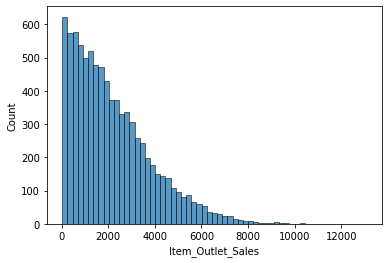

In [24]:
import seaborn as sns
sns.histplot(data=df,x='Item_Outlet_Sales');
# Right-skewed histogram since all the outlliers are on the right.
# It seems as if the majority of the data fall under ~6000 in sales.

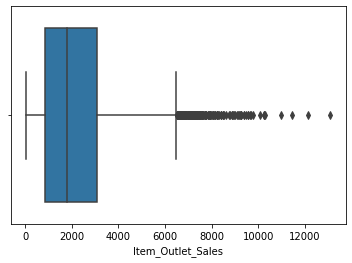

In [25]:
sns.boxplot(data=df, x='Item_Outlet_Sales')
# Based on the above histogram, I suspected there'd be some outliers, but I was surprised at how many.
# Previously, I assumed most of the data would be less than 8000 but it seems that number is inaccurate based on how many
# data points there are beyond 6000.

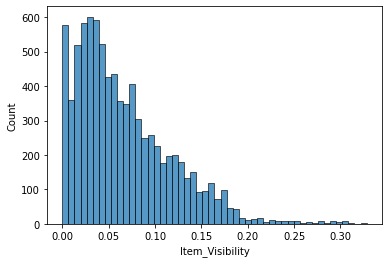

In [26]:
sns.histplot(data=df,x='Item_Visibility');
# Like the histogram for Item_Outlet_Sales, majority of the data for Item_Visibility seems to be less than .2
# However, unlike Item_Outlet_Sales, it's clearer in this histogram that there may be a good number of outliers
# for Item_Visibility.

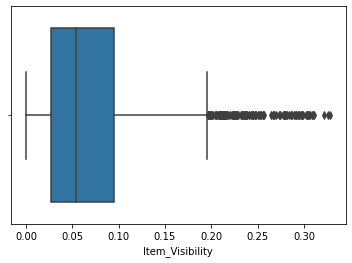

In [27]:
sns.boxplot(data=df, x='Item_Visibility');
# Sure enough, there are a lot of outliers.

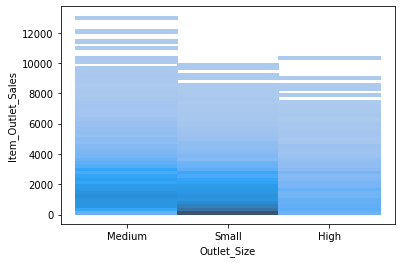

In [28]:
sns.histplot(data=df,x='Outlet_Size',y='Item_Outlet_Sales');
# Medium size stores have the widest range of sales amounts while Small stores have the smallest sales range.
# It is interesting to note that the sales range between Small and High is not the largest, despite being the largest range size-wise. 

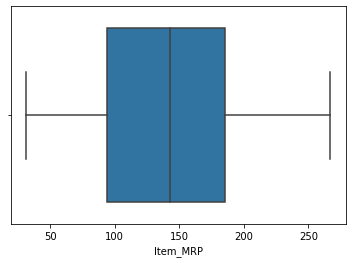

In [29]:
sns.boxplot(data=df, x='Item_MRP');
# There are no outliers for Item_MRP. All the prices fall within the min-max range.

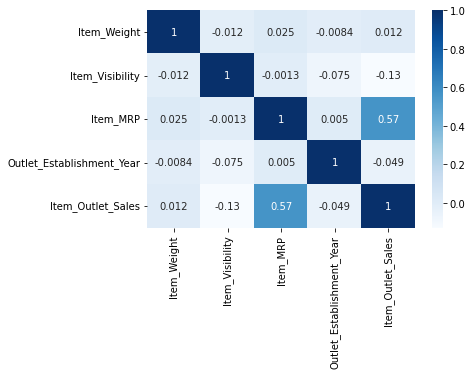

In [30]:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='Blues');
# There is a positive, moderate correlation between Item_MRP and Item_Outlet_Sales.

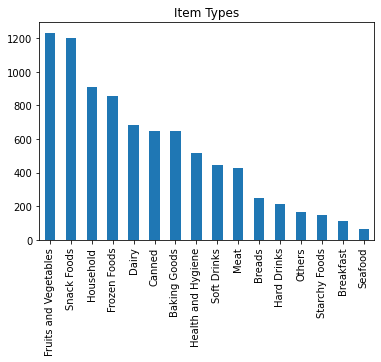

In [31]:
import matplotlib.pyplot as plt

itemType = df['Item_Type'].value_counts()
itemType.plot(kind='bar')
plt.title('Item Types');
# Most items sold are of type Fruits & Vegetables while the least sold item type is Seafood.

Part 4

In [42]:
typeAvg = df.groupby('Item_Type')['Item_MRP'].mean()
salesAvg = df.groupby('Item_Type')['Item_Outlet_Sales'].mean()

(1900.0, 2400.0)

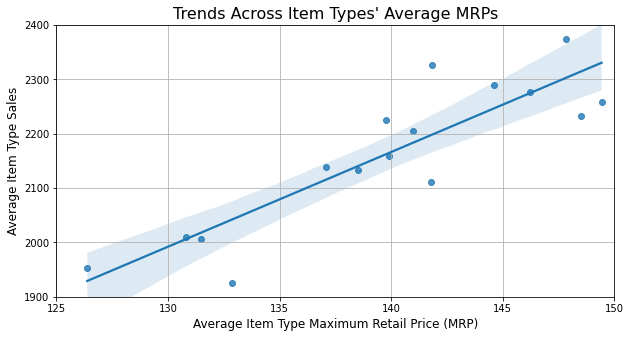

In [148]:
plt.figure(figsize=(10,5))
sns.regplot(x=typeAvg,y=salesAvg)
plt.xlabel('Average Item Type Maximum Retail Price (MRP)',fontsize=12)
plt.ylabel('Average Item Type Sales',fontsize=12)
plt.title("Trends Across Item Types' Average MRPs",fontsize=16)
plt.grid()
plt.xlim(125,150)
plt.ylim(1900,2400)
# plt.legend();
# Generally, item types with higher average MRPs generated greater sales than those with lesser MRPs.
# To increase sales, increasing item prices should be considered.

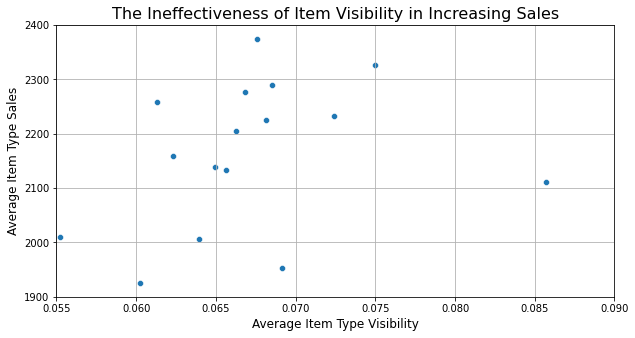

In [155]:
plt.figure(figsize=(10,5))
typeVis = df.groupby('Item_Type')['Item_Visibility'].mean()
sns.scatterplot(x=typeVis,y=salesAvg)
plt.xlabel('Average Item Type Visibility',fontsize=12)
plt.ylabel('Average Item Type Sales',fontsize=12)
plt.grid()
plt.xlim(.055,.09)
plt.ylim(1900,2400)
plt.title("The Ineffectiveness of Item Visibility in Increasing Sales",fontsize=16);
# As the graph shows, more visibility does not lead to more sales. In fact, it is likely not influential in
# generating sales as the range with greatest sales (0.06 - 0.075) also has the lowest sales. It should not
# be considered as a significant factor in raising sales.

In [76]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


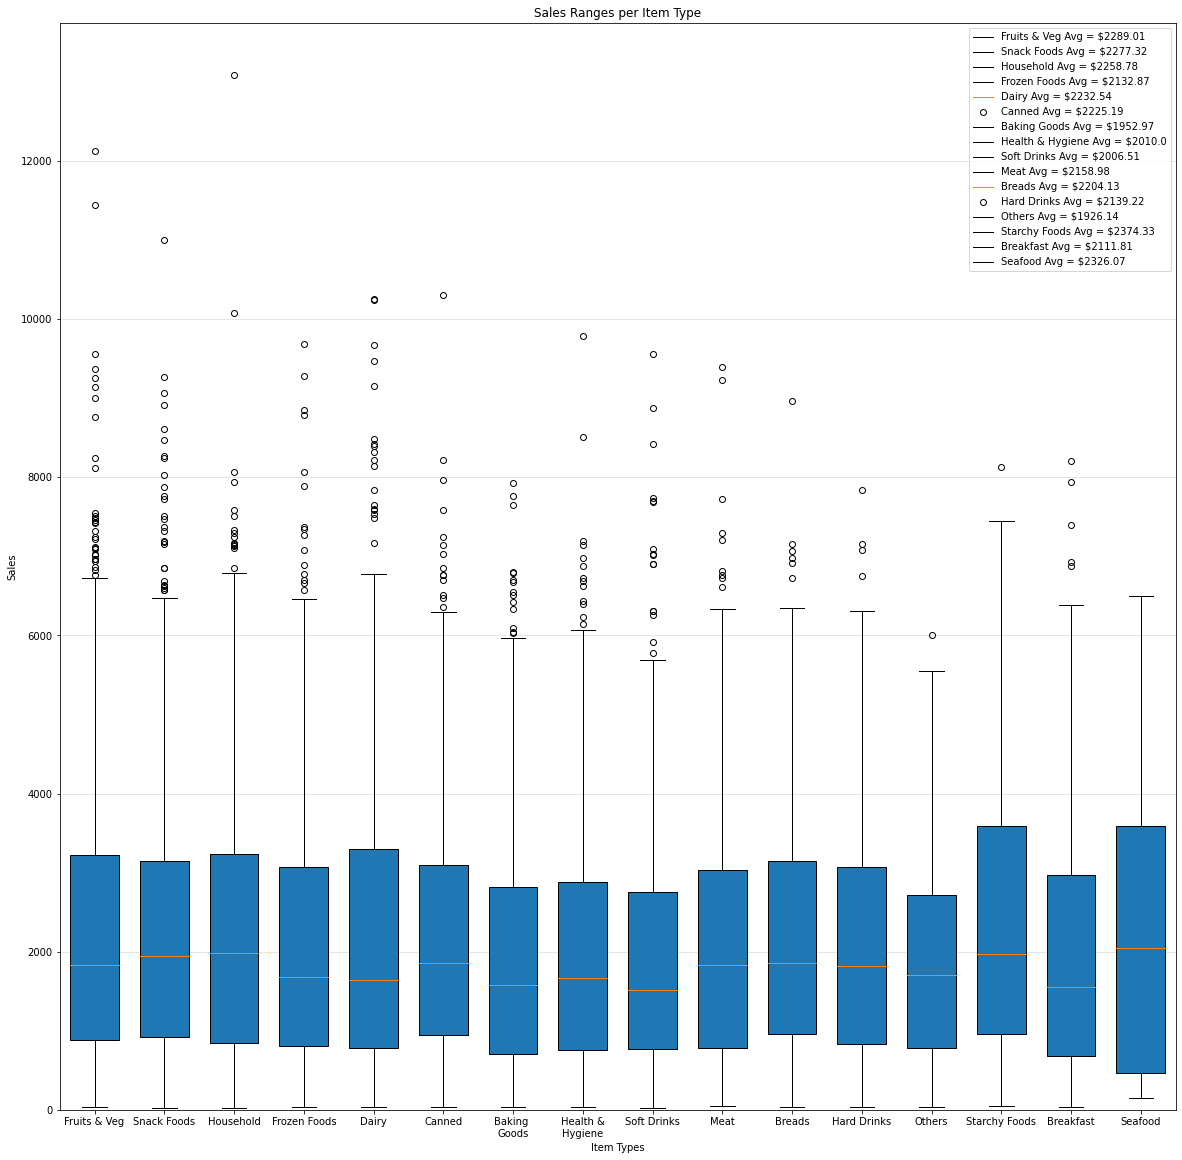

In [164]:
fv = df[df['Item_Type']=='Fruits and Vegetables']['Item_Outlet_Sales']
sf = df[df['Item_Type']=='Snack Foods']['Item_Outlet_Sales']
h = df[df['Item_Type']=='Household']['Item_Outlet_Sales']
ff = df[df['Item_Type']=='Frozen Foods']['Item_Outlet_Sales']
d = df[df['Item_Type']=='Dairy']['Item_Outlet_Sales']
c = df[df['Item_Type']=='Canned']['Item_Outlet_Sales']
bg = df[df['Item_Type']=='Baking Goods']['Item_Outlet_Sales']
hh = df[df['Item_Type']=='Health and Hygiene']['Item_Outlet_Sales']
sd = df[df['Item_Type']=='Soft Drinks']['Item_Outlet_Sales']
m = df[df['Item_Type']=='Meat']['Item_Outlet_Sales']
b = df[df['Item_Type']=='Breads']['Item_Outlet_Sales']
hd = df[df['Item_Type']=='Hard Drinks']['Item_Outlet_Sales']
o = df[df['Item_Type']=='Others']['Item_Outlet_Sales']
stf = df[df['Item_Type']=='Starchy Foods']['Item_Outlet_Sales']
bf = df[df['Item_Type']=='Breakfast']['Item_Outlet_Sales']
seaf = df[df['Item_Type']=='Seafood']['Item_Outlet_Sales']
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(20,20))
boxplots = axes.boxplot([fv,sf,h,ff,d,c,bg,hh,sd,m,b,hd,o,stf,bf,seaf],
                        widths=.7,
                        patch_artist=True,
                        meanline=True,
                        meanprops = dict(linestyle='-', linewidth=2, color='Yellow'),
                        labels = ['Fruits & Veg','Snack Foods','Household','Frozen Foods',
                        'Dairy','Canned','Baking \nGoods','Health &\nHygiene','Soft Drinks',
                        'Meat','Breads','Hard Drinks','Others','Starchy Foods','Breakfast','Seafood'])
plt.xlabel('Item Types')
plt.ylabel('Sales')
plt.title('Sales Ranges per Item Type')
plt.grid(axis='y',alpha=.4)
plt.ylim(0)
plt.legend([f'Fruits & Veg Avg = ${round(fv.mean(),2)}',f'Snack Foods Avg = ${round(sf.mean(),2)}',
            f'Household Avg = ${round(h.mean(),2)}',f'Frozen Foods Avg = ${round(ff.mean(),2)}',
            f'Dairy Avg = ${round(d.mean(),2)}',f'Canned Avg = ${round(c.mean(),2)}',
            f'Baking Goods Avg = ${round(bg.mean(),2)}',f'Health & Hygiene Avg = ${round(hh.mean(),2)}',
            f'Soft Drinks Avg = ${round(sd.mean(),2)}',f'Meat Avg = ${round(m.mean(),2)}',
            f'Breads Avg = ${round(b.mean(),2)}',f'Hard Drinks Avg = ${round(hd.mean(),2)}',
            f'Others Avg = ${round(o.mean(),2)}',f'Starchy Foods Avg = ${round(stf.mean(),2)}',
            f'Breakfast Avg = ${round(bf.mean(),2)}',f'Seafood Avg = ${round(seaf.mean(),2)}']);
# Based on averages and the ranges of the distributions, there aren't any item types that generate signficantly more sales
# than the others. Additionally, most of the outliers of all categories fall under 10,000. Therefore, there aren't any
# specific item types stores need to push to increase revenue.